In [2]:
import pandas as pd
import numpy as np
import tqdm as tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"data\bands_ndsi.csv")
df.drop(columns = ['Unnamed: 0'], inplace=True)
df

,year,month,ndsi,swir,green,s1c0,s0c1,s0c0
0,2013,4,0.947373,0.018652,0.690203,1,0,0
1,2013,4,0.931859,0.023328,0.661355,1,0,0
2,2013,4,0.944181,0.019340,0.673620,1,0,0
3,2013,4,0.949972,0.017772,0.692732,1,0,0
4,2013,4,0.945255,0.019643,0.697958,1,0,0
...,...,...,...,...,...,...,...,...
31275742,2023,12,0.255100,0.379260,0.639025,0,1,0
31275743,2023,12,0.266335,0.284605,0.491240,0,1,0
31275744,2023,12,0.291025,0.293432,0.534333,0,1,0
31275745,2023,12,0.283981,0.325470,0.583640,0,1,0


In [4]:
df[df['ndsi'] > 1]

,year,month,ndsi,swir,green,s1c0,s0c1,s0c0
4573,2013,4,1.027787,-0.003348,0.244290,1,0,0
5275,2013,4,1.016326,-0.002000,0.247012,1,0,0
5288,2013,4,1.008646,-0.001037,0.241045,1,0,0
5293,2013,4,1.048094,-0.003842,0.163632,1,0,0
5294,2013,4,1.077883,-0.006125,0.163412,1,0,0
...,...,...,...,...,...,...,...,...
31120566,2023,12,1.012410,-0.003897,0.632013,0,0,1
31120567,2023,12,1.016459,-0.004970,0.608885,0,0,1
31120568,2023,12,1.014643,-0.004530,0.623240,0,0,1
31120569,2023,12,1.017461,-0.005602,0.647303,0,0,1


In [5]:
df[(df['swir'] < 0) & (df['green'] < 0)]

,year,month,ndsi,swir,green,s1c0,s0c1,s0c0
499044,2013,6,0.915535,-0.002138,-0.048475,0,0,1
499779,2013,6,0.871917,-0.003155,-0.046110,0,0,1
504186,2013,6,0.595071,-0.011378,-0.044818,0,0,1
505655,2013,6,0.732036,-0.010222,-0.066075,0,0,1
736430,2013,7,0.345339,-0.005135,-0.010552,0,0,1
...,...,...,...,...,...,...,...,...
31020640,2023,11,0.169957,-0.007252,-0.010222,1,0,0
31020641,2023,11,0.790917,-0.005052,-0.043277,1,0,0
31020642,2023,11,0.881942,-0.003210,-0.051170,1,0,0
31020643,2023,11,0.891328,-0.001863,-0.032415,1,0,0


In [6]:
df[df['ndsi'] < -1]

,year,month,ndsi,swir,green,s1c0,s0c1,s0c0
382232,2013,5,-1.299538,0.082700,-0.010773,0,1,0
382239,2013,5,-1.374307,0.058912,-0.009288,0,0,1
382240,2013,5,-1.712217,0.055475,-0.014568,0,0,1
382241,2013,5,-1.130486,0.069472,-0.004255,0,0,1
382973,2013,5,-1.423995,0.055613,-0.009728,0,0,1
...,...,...,...,...,...,...,...,...
31184757,2023,12,-1.668753,0.183350,-0.045945,0,1,0
31185490,2023,12,-1.080270,0.166575,-0.006428,0,1,0
31185491,2023,12,-1.774848,0.161680,-0.045148,0,1,0
31186223,2023,12,-1.074163,0.144382,-0.005163,0,1,0


In [7]:
df = df[~((df['green'] < 0) | (df['swir'] < 0))]
df


,year,month,ndsi,swir,green,s1c0,s0c1,s0c0
0,2013,4,0.947373,0.018652,0.690203,1,0,0
1,2013,4,0.931859,0.023328,0.661355,1,0,0
2,2013,4,0.944181,0.019340,0.673620,1,0,0
3,2013,4,0.949972,0.017772,0.692732,1,0,0
4,2013,4,0.945255,0.019643,0.697958,1,0,0
...,...,...,...,...,...,...,...,...
31275742,2023,12,0.255100,0.379260,0.639025,0,1,0
31275743,2023,12,0.266335,0.284605,0.491240,0,1,0
31275744,2023,12,0.291025,0.293432,0.534333,0,1,0
31275745,2023,12,0.283981,0.325470,0.583640,0,1,0


C:\Users\Pranav Koka\AppData\Local\Temp\ipykernel_14456\205014273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)
C:\Users\Pranav Koka\AppData\Local\Temp\ipykernel_14456\205014273.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels())
C:\Users\Pranav Koka\AppData\Local\Temp\ipykernel_14456\205014273.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels())
C:\Users\Pranav Koka\AppData\Local\Temp\ipykernel_144

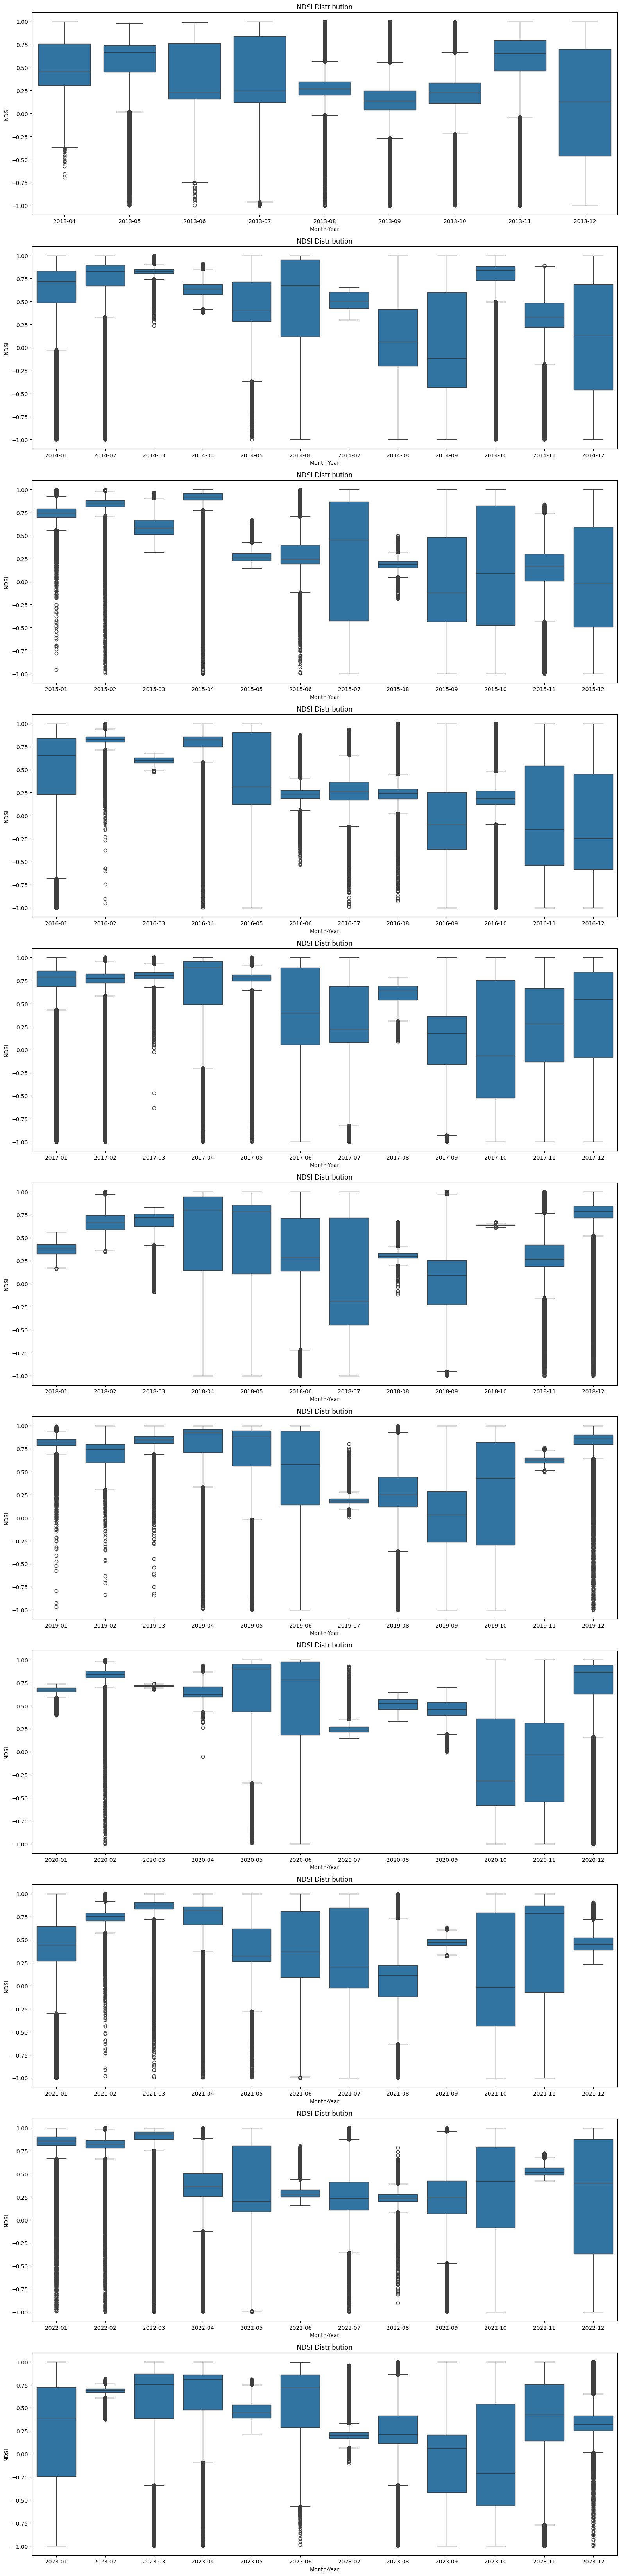

In [14]:
import math

# Ensure the DataFrame has a 'month_year' column
df['month_year'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# Settings for the number of plots per subplot
first_subplot_plots = 9
subsequent_plots_per_subplot = 12

# Get unique 'month_year' values
unique_month_years = sorted(df['month_year'].unique())

# Calculate the total number of subplots required
remaining_plots = len(unique_month_years) - first_subplot_plots
num_subsequent_subplots = math.ceil(remaining_plots / subsequent_plots_per_subplot)
total_subplots = 1 + num_subsequent_subplots  # 1 for the first + subsequent subplots

# Create subplots
fig, axes = plt.subplots(total_subplots, 1, figsize=(16, 6 * total_subplots), sharey=True)

# Ensure axes is iterable, even if there's only one subplot
if total_subplots == 1:
    axes = [axes]

# Create the first subplot
first_subset = unique_month_years[:first_subplot_plots]
df_first_subset = df[df['month_year'].isin(first_subset)]
sns.boxplot(x='month_year', y='ndsi', data=df_first_subset, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels())
axes[0].set_title(f'NDSI Distribution')
axes[0].set_xlabel('Month-Year')
axes[0].set_ylabel('NDSI')

# Create the subsequent subplots
for i, ax in enumerate(axes[1:]):
    start_idx = first_subplot_plots + i * subsequent_plots_per_subplot
    end_idx = start_idx + subsequent_plots_per_subplot
    subset_month_years = unique_month_years[start_idx:end_idx]
    
    # Filter the DataFrame for this subset
    df_subset = df[df['month_year'].isin(subset_month_years)]
    
    # Create the box plot
    sns.boxplot(x='month_year', y='ndsi', data=df_subset, ax=ax)
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels())
    
    # Set plot title and labels
    ax.set_title(f'NDSI Distribution')
    ax.set_xlabel('Month-Year')
    ax.set_ylabel('NDSI')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [9]:
df['month_year'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

summary_df = (
    df.groupby('month_year')['ndsi']
    .agg(
        percentile_25=lambda x: x.quantile(0.25),
        median=lambda x: x.median(),
        percentile_75=lambda x: x.quantile(0.75)
    )
    .reset_index()
)

# Preview the resulting DataFrame
print(summary_df)


C:\Users\Pranav Koka\AppData\Local\Temp\ipykernel_14456\4112341022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)


    month_year  percentile_25    median  percentile_75
0      2013-04       0.305766  0.455720       0.758753
1      2013-05       0.450295  0.665620       0.739386
2      2013-06       0.158434  0.226039       0.761798
3      2013-07       0.120121  0.249820       0.839165
4      2013-08       0.199601  0.267682       0.346562
..         ...            ...       ...            ...
124    2023-08       0.112764  0.209100       0.413905
125    2023-09      -0.418022  0.063008       0.206480
126    2023-10      -0.563455 -0.207298       0.542673
127    2023-11       0.143602  0.429535       0.752715
128    2023-12       0.253380  0.320738       0.413087

[129 rows x 4 columns]


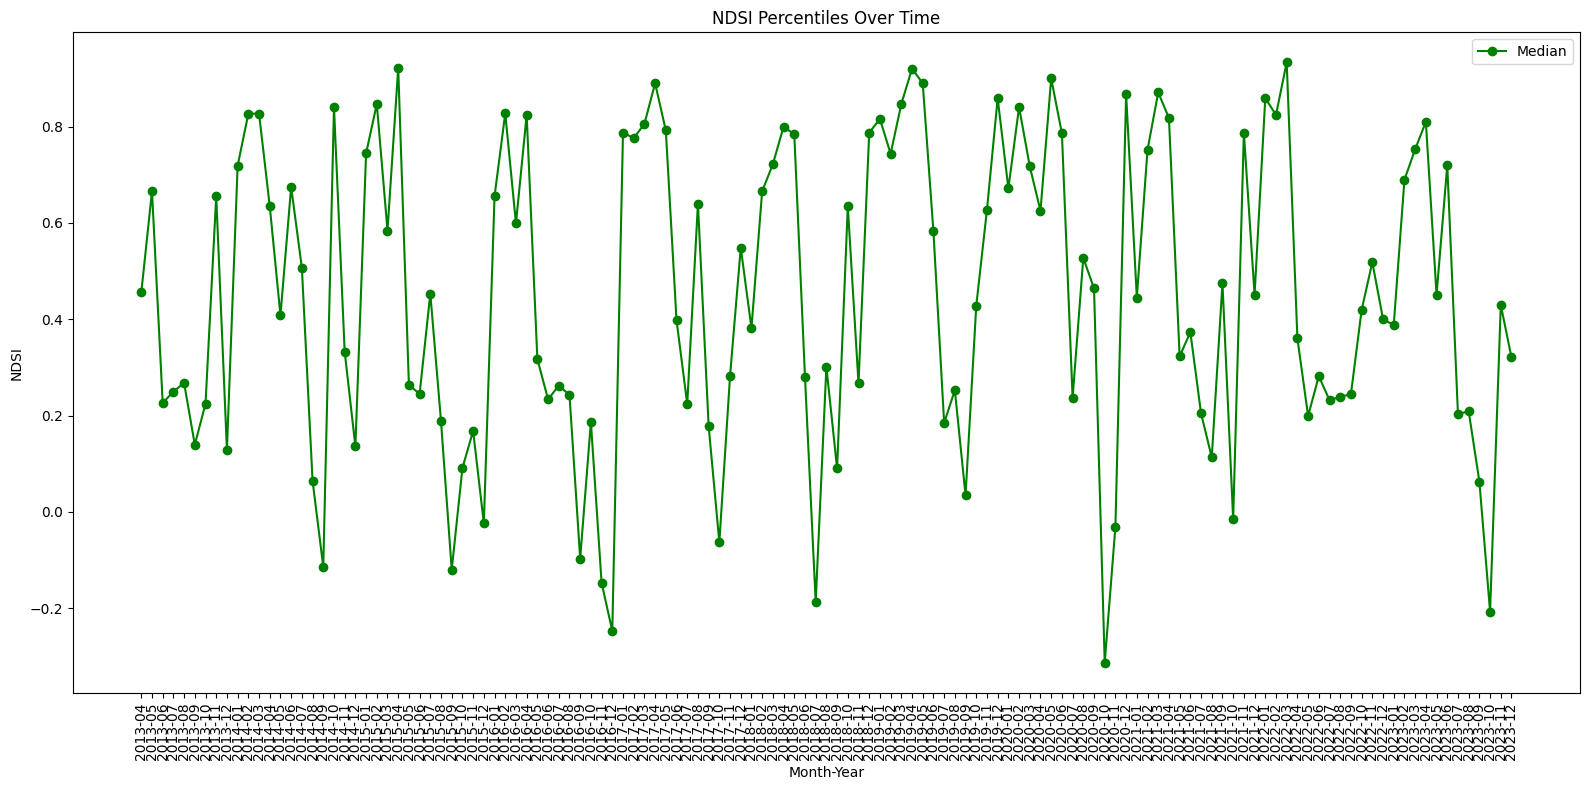

In [10]:
plt.figure(figsize=(16, 8))

plt.plot(summary_df['month_year'], summary_df['median'], label='Median', color='green', marker='o')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels, title, and legend
plt.xlabel('Month-Year')
plt.ylabel('NDSI')
plt.title('NDSI Percentiles Over Time')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [11]:
summary_df.to_csv('data/ndsi_summary.csv')